# Imports

In [77]:
import torch
from sklearn.preprocessing import label_binarize

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Naive Bayes classifier - Class definition

In [79]:
class GNB:

    def __init__(self):
        self.priori={}
        self.means={}
        self.variances={}
        self.num_clasas=[] 

    def fit(self,X,y):
        self.num_clasas=np.unique(y)  
        n_samples,n_features=X.shape
        
        for c in self.num_clasas:
            X_c=X[y==c] 
            self.priori[c]=len(X_c)/n_samples 
            self.means[c]=np.mean(X_c,axis=0)
            self.variances[c]=np.var(X_c,axis=0)  

    def gaussian_pdf(self,x,mean,var,epsilon=1e-9):
        return (1/np.sqrt(2*np.pi*(var+epsilon)))*np.exp(-((x-mean)**2)/(2*(var+epsilon)))
        # pass


    def predict_proba(self, X):
        probs=[]
        for x in X:
            posterior_prob={}
            for c in self.num_clasas:
                prior=np.log(self.priori[c]) 
                likelihood_probs=np.sum(np.log(self.gaussian_pdf(x,self.means[c],self.variances[c])+1e-9))
                posterior_prob[c]=prior+likelihood_probs
            softmax_probs=np.exp(list(posterior_prob.values()))/sum(np.exp(list(posterior_prob.values())))
            probs.append(softmax_probs)
        return np.array(probs)

    def predict(self,X):
        probs=self.predict_proba(X)
        return np.argmax(probs,axis=1)

# Plots

In [80]:
def plot_roc_curve(y_test,y_scores,classes):
    y_test_bin=label_binarize(y_test,classes=classes)
    plt.figure()
    for i,class_label in enumerate(classes):
        fpr,tpr,_=roc_curve(y_test_bin[:,i],y_scores[:,i])
        roc_auc=auc(fpr,tpr)
        plt.plot(fpr,tpr,label=f'Class {class_label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Main function call

Accuracy: 70.52715654952077 %

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8007
           1       0.75      0.73      0.74      3561
           2       0.54      0.54      0.54      3456

    accuracy                           0.71     15024
   macro avg       0.68      0.68      0.68     15024
weighted avg       0.71      0.71      0.71     15024



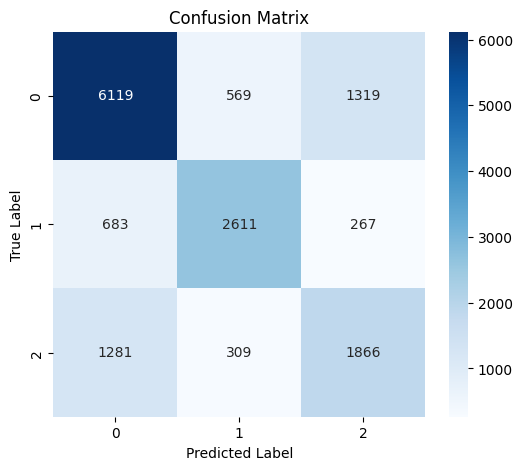

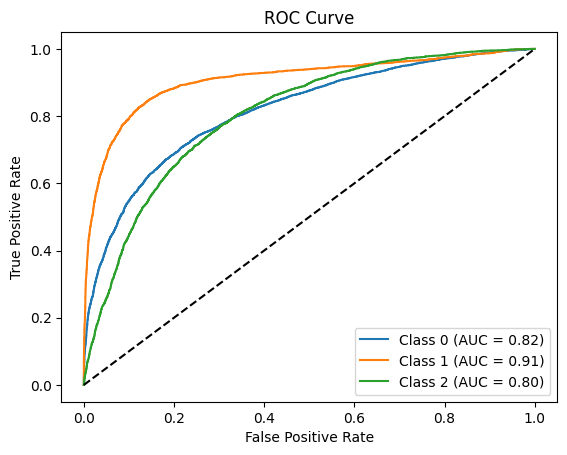

In [81]:
if __name__=="__main__":
    df=pd.read_csv("cleaned.csv")
    X=df.iloc[:,:-1].values  
    y=df.iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    gnb=GNB()
    gnb.fit(X_train,y_train)
    y_pred=gnb.predict(X_test)
    y_scores=gnb.predict_proba(X_test)
    
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy:",acc*100,"%")
    
    print("\nClassification Report:")
    print(classification_report(y_test,y_pred))    
    plot_confusion_matrix(y_test,y_pred)
    plot_roc_curve(y_test,y_scores,classes=np.unique(y))
